<a href="https://colab.research.google.com/github/Raihandany/PCVK_Ganjil_2023/blob/main/Week3_PCVK_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


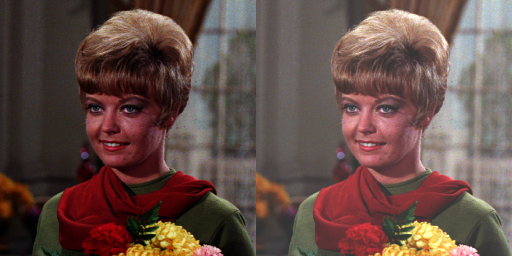

In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/prac_week3/img/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara
#brightness_image

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


# **TASK**

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: -250


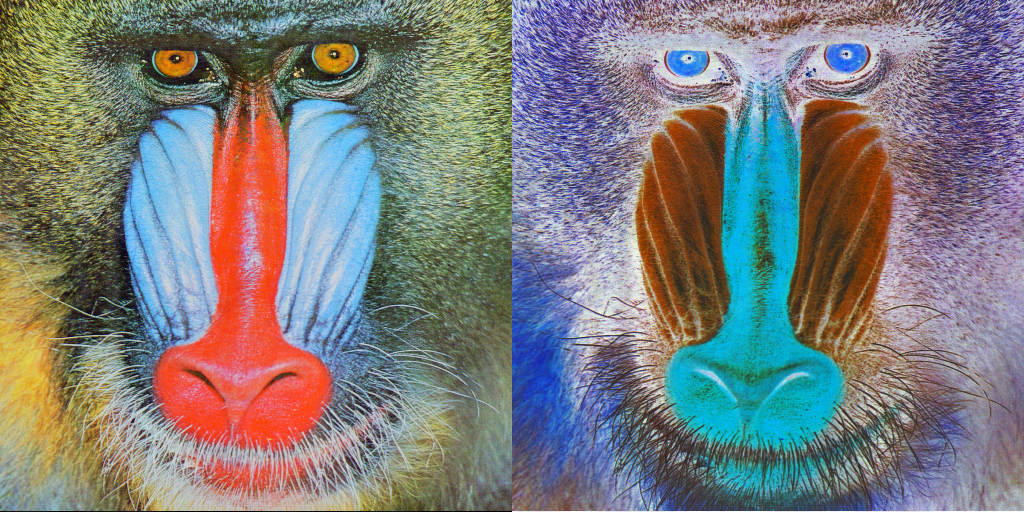

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/prac_week3/img/mandrill.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
#for y in range(original.shape[0]):
#  for x in range(original.shape[1]):
#    for c in range(original.shape[2]):
#      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan [-255 - 255]: 60
Masukkan nilai kontras [1.0 - 1.0]: 1.5


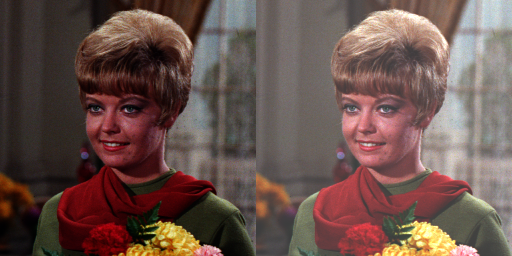

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import math
import matplotlib.pyplot as plt

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan nilai kontras [1.0 - 1.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/prac_week3/img/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      new_value = int(original[y,x,c] * contrast + brightness)
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta=(contrast*math.log(1+brightness)))

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


Change the brightness level of the image using log transformation
------------------------------------------------------------------
Enter brightness value: 40


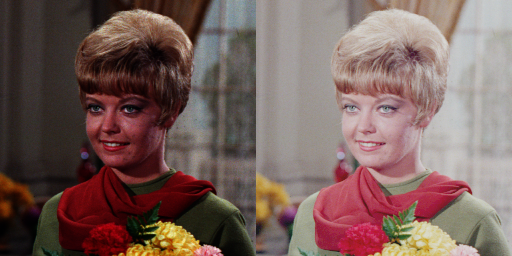

In [6]:
print('Change the brightness level of the image using log transformation')
print('------------------------------------------------------------------')
try:
  brightness = int(input('Enter brightness value: '))
except ValueError:
  print('Error, not a number')

original_4 = cv.imread('/content/drive/MyDrive/PCVK_MM/prac_week3/img/female.tiff')
log_image = np.zeros(original_4.shape, original_4.dtype)

#access per pixels
for y in range(original_4.shape[0]):
  for x in range(original_4.shape[1]):
    for c in range(original_4.shape[2]):
      log_image[y,x,c] = brightness * (np.log(original_4[y,x,c] + 1))

final_frame3 = cv.hconcat((original_4, log_image))
cv2_imshow(final_frame3)

<ipython-input-7-5cdfb745c447>:15: RuntimeWarning: overflow encountered in ubyte_scalars
  grayscale_lightness[y, x] = (max(r, g, b) + min(r, g, b)) // 2


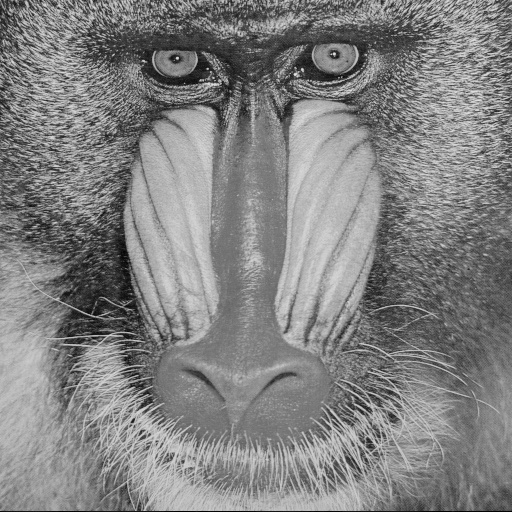

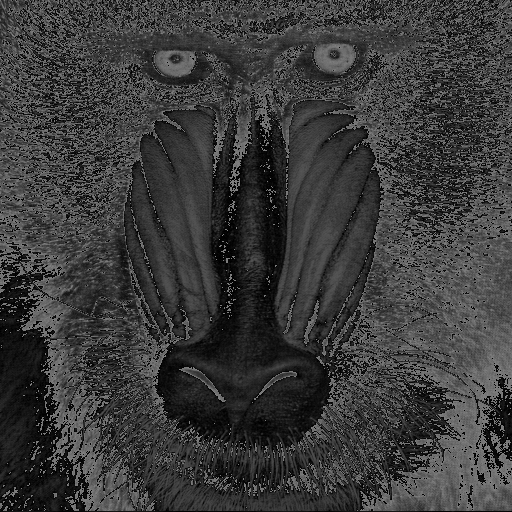

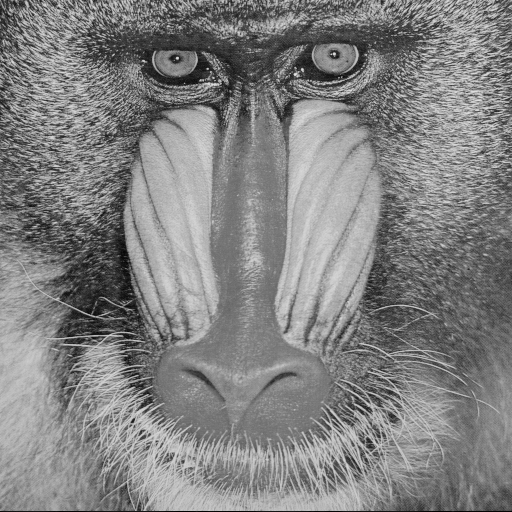

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

original_image = cv2.imread('/content/drive/MyDrive/PCVK_MM/prac_week3/img/mandrill.tiff')

# Convert to grayscale using averaging method
grayscale_averaging = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Convert into grayscale using lightness method
grayscale_lightness = np.zeros(original_image.shape[:2], dtype=np.uint8)
for y in range(original_image.shape[0]):
    for x in range(original_image.shape[1]):
        b, g, r = original_image[y, x]
        grayscale_lightness[y, x] = (max(r, g, b) + min(r, g, b)) // 2

yuv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2YUV)
grayscale_luminance = yuv_image[:, :, 0]

cv2_imshow(grayscale_averaging)
cv2_imshow(grayscale_lightness)
cv2_imshow(grayscale_luminance)

DisabledFunctionError: ignored

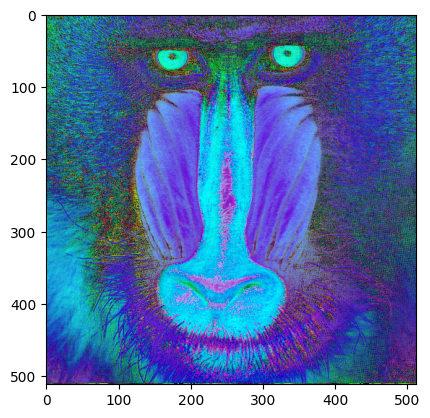

In [12]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

original = cv.imread('/content/drive/MyDrive/PCVK_MM/prac_week3/img/mandrill.tiff')
hsv_image = cv.cvtColor(original, cv2.COLOR_BGR2HSV)

plt.imshow(hsv_image)

lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])

blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

blue_only = cv2.bitwise_and(hsv_image, hsv_image, mask=blue_mask)

cv2.imshow('Original Image', hsv_image)
cv2.imshow('Blue Only', blue_only)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.destroyAllWindows()

final_frame = cv.hconcat((original, blue_only))
cv2_imshow(final_frame)